In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
data=data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


In [6]:
print(data.isnull().sum())  


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64


In [7]:
data.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000
mean,3.071666,9.978982e+05,3123.210332,7566.399913,12.702761
std,0.944708,5.934989e+05,125.534940,4457.405884,7.550030
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.300000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,55.800000


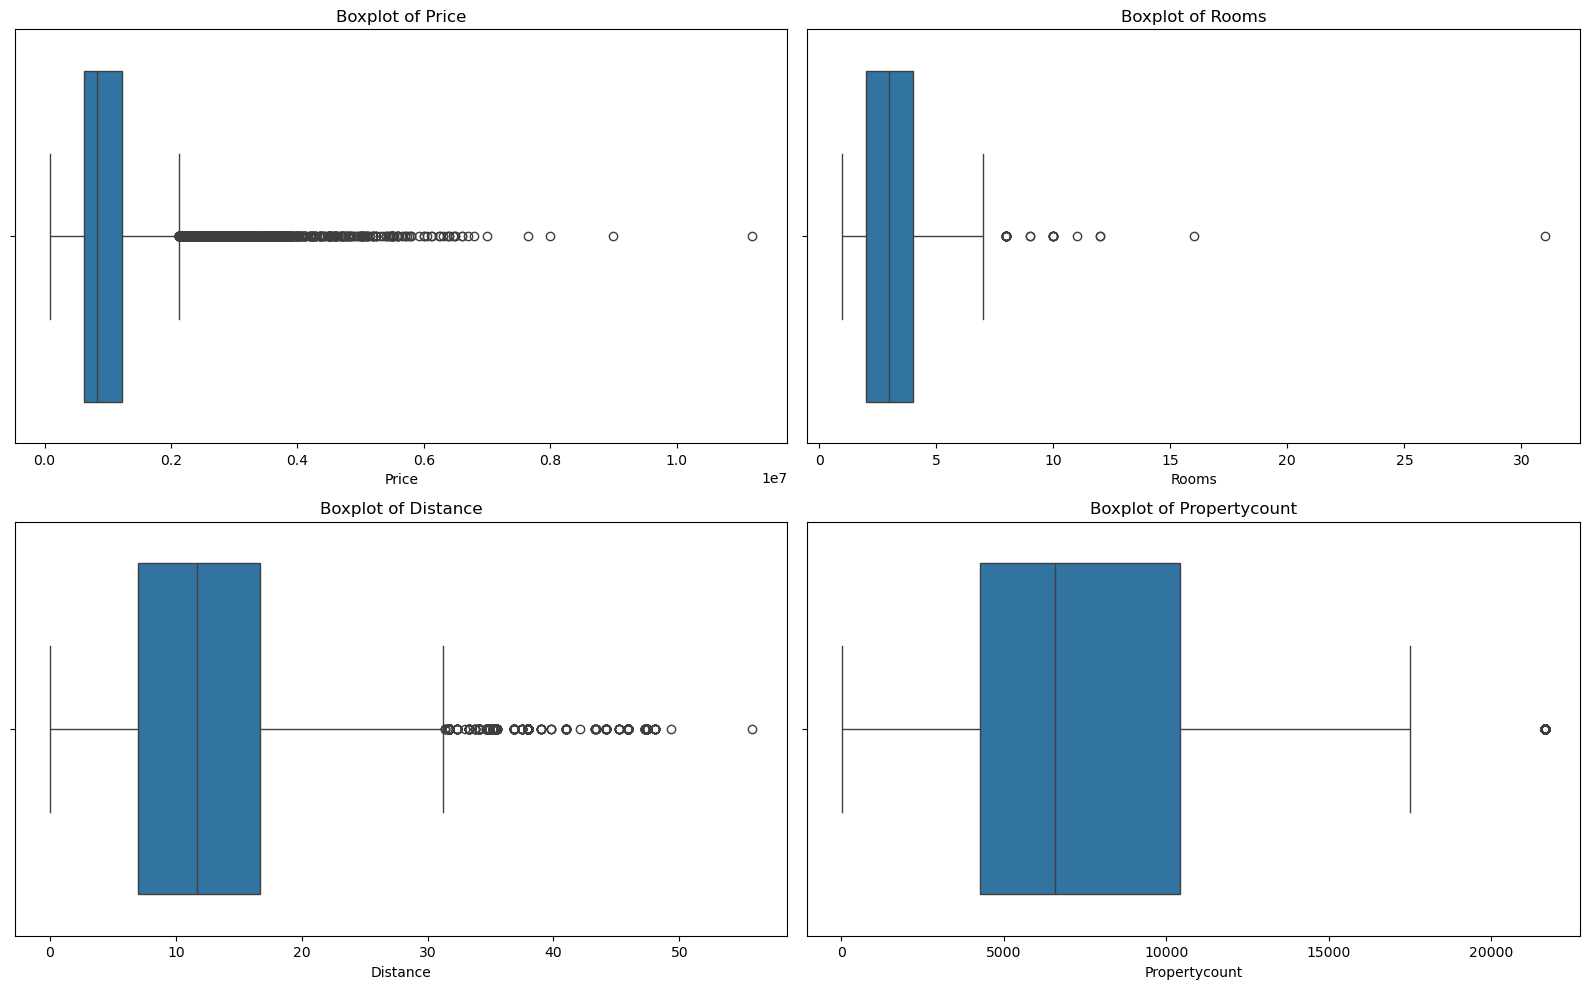

In [8]:
numeric_cols = ['Price', 'Rooms', 'Distance', 'Propertycount']

plt.figure(figsize=(16, 10)) 
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i) 
    sns.boxplot(data=data, x=col) 
    plt.title(f'Boxplot of {col}')  
plt.tight_layout() 
plt.show()

In [9]:
data = data[
    (data['Price'] < 3000000) &
    (data['Rooms'] <= 10) &
    (data['Distance'] <= 40)
]

print(data.shape)

(47563, 13)


In [10]:
data.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,47563.000000,4.756300e+04,47563.000000,47563.000000,47563.000000
mean,3.052015,9.608326e+05,3120.664887,7578.660261,12.621767
std,0.922611,4.841384e+05,120.971120,4465.944544,7.242377
min,1.000000,8.500000e+04,3000.000000,83.000000,0.000000
25%,2.000000,6.180000e+05,3049.000000,4294.000000,7.000000
50%,3.000000,8.250000e+05,3101.000000,6567.000000,11.700000
75%,4.000000,1.200000e+06,3163.000000,10412.000000,16.700000
max,10.000000,2.990000e+06,3977.000000,21650.000000,39.800000


In [11]:
categorical_cols = ['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'Regionname', 'CouncilArea']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [12]:
data

,Address,Rooms,Price,Date,Propertycount,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,49 Lithgow St,3,1490000.0,1/04/2017,4019,3.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,59A Turner St,3,1220000.0,1/04/2017,4019,3.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,119B Yarra St,3,1420000.0,1/04/2017,4019,3.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,68 Vida St,3,1515000.0,1/04/2017,1543,7.5,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,92 Clydesdale Rd,2,670000.0,1/04/2017,3464,10.4,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,4/34 Petrie St,2,347700.0,31/03/2018,17055,38.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63017,229 Murray Rd,3,808000.0,31/03/2018,14577,8.4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63018,3 Carr Pl,3,566000.0,31/03/2018,5833,20.6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63019,9 Parker Ct,3,500000.0,31/03/2018,5833,20.6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data=data.drop('Address' , axis=True)

In [14]:
data

,Rooms,Price,Date,Propertycount,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,3,1490000.0,1/04/2017,4019,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,3,1220000.0,1/04/2017,4019,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,3,1420000.0,1/04/2017,4019,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3,1515000.0,1/04/2017,1543,7.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,670000.0,1/04/2017,3464,10.4,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,2,347700.0,31/03/2018,17055,38.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63017,3,808000.0,31/03/2018,14577,8.4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63018,3,566000.0,31/03/2018,5833,20.6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63019,3,500000.0,31/03/2018,5833,20.6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47563 entries, 0 to 63020
Columns: 1021 entries, Rooms to CouncilArea_Yarra Ranges Shire Council
dtypes: bool(1016), float64(2), int64(2), object(1)
memory usage: 48.3+ MB


In [16]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['year']=data['Date'].apply(lambda X:X.year)
data['month']=data['Date'].apply(lambda X:X.month)
data['day']=data['Date'].apply(lambda X:X.day)
data=data.drop('Date' , axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47563 entries, 0 to 63020
Columns: 1023 entries, Rooms to day
dtypes: bool(1016), float64(5), int64(2)
memory usage: 49.0 MB


In [18]:
data

,Rooms,Price,Propertycount,Distance,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,...,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,year,month,day
0,3,1490000.0,4019,3.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,2017.0,1.0,4.0
1,3,1220000.0,4019,3.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,2017.0,1.0,4.0
2,3,1420000.0,4019,3.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,2017.0,1.0,4.0
3,3,1515000.0,1543,7.5,True,False,False,False,False,False,...,False,False,False,False,False,False,False,2017.0,1.0,4.0
4,2,670000.0,3464,10.4,False,True,False,False,False,False,...,False,False,False,False,False,False,False,2017.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,2,347700.0,17055,38.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,NaN,NaN,NaN
63017,3,808000.0,14577,8.4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,NaN,NaN,NaN
63018,3,566000.0,5833,20.6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,NaN,NaN,NaN
63019,3,500000.0,5833,20.6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,NaN,NaN,NaN


In [19]:
data.reset_index(drop=True, inplace=True)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47563 entries, 0 to 47562
Columns: 1023 entries, Rooms to day
dtypes: bool(1016), float64(5), int64(2)
memory usage: 48.6 MB


In [21]:
X=data.drop('Price',axis=1)
y=data['Price']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, mean_absolute_percentage_error


rf_model2 = RandomForestRegressor(
    n_estimators=150, max_depth=20,
    min_samples_split=10, min_samples_leaf=5,
    random_state=42, n_jobs=-1
)


rf_model2.fit(X_train, y_train)

y_pred2 = rf_model2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)
mape = mean_absolute_percentage_error(y_test, y_pred2)
medae = median_absolute_error(y_test, y_pred2)

# الطباعة
print("Random Forest Evaluation :")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Median Absolute Error (MedAE): {medae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"R² Score: {r2:.4f}")



Random Forest Evaluation :
Mean Absolute Error (MAE): 158,923.94
Median Absolute Error (MedAE): 105,749.97
Mean Squared Error (MSE): 55,303,946,470.83
Root Mean Squared Error (RMSE): 235,167.91
Mean Absolute Percentage Error (MAPE): 16.96%
R² Score: 0.7615


In [ ]:
from sklearn.linear_model import  LinearRegression


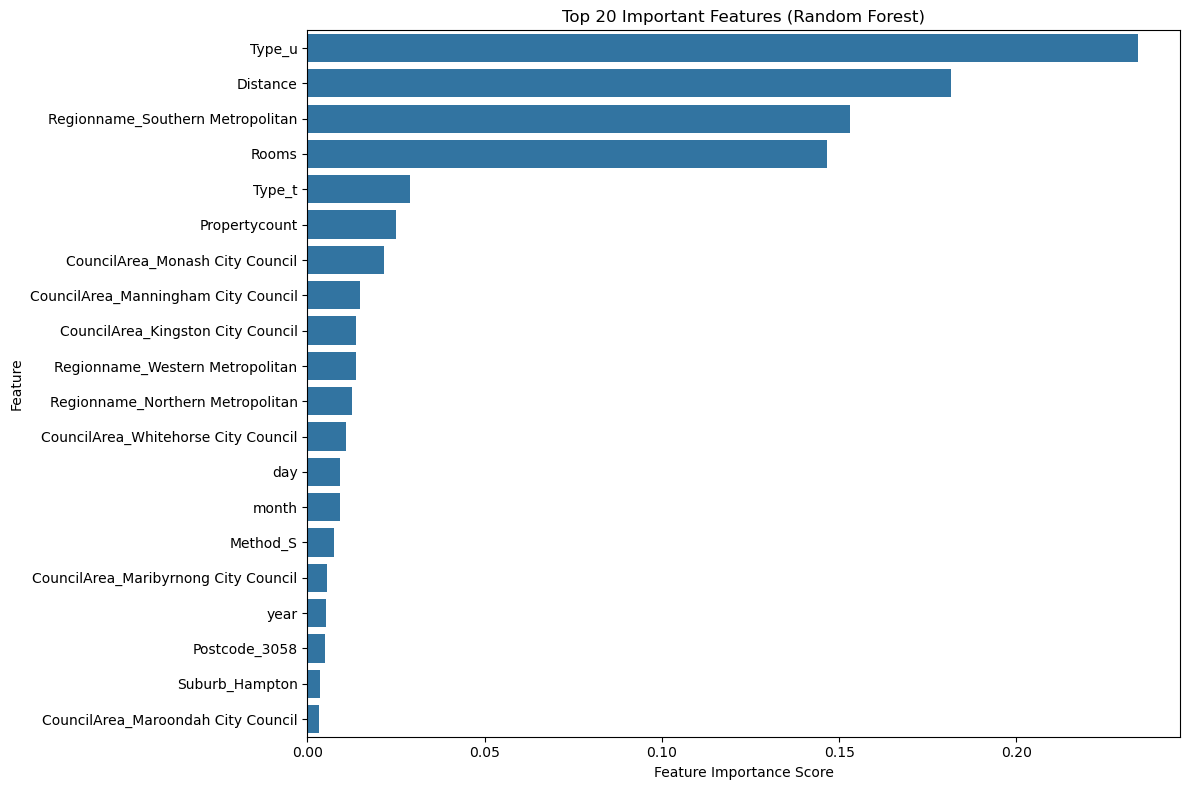

In [25]:

feature_importances = pd.Series(rf_model2.feature_importances_, index=X_train.columns)

top_features = feature_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
